In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
d3=pd.read_csv('sbi_insurance.csv')
d3.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
d3.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [4]:
#there are no null values

In [5]:
d3.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
#there are 1338 rows and 8 attributes including the target insurance claim
#mean is greater than median for age,bmi smoker and charges.so they are right skewed datas and others are left skewed
#there is great difference between  75% and max for charges,so there are outliers present in this dataset

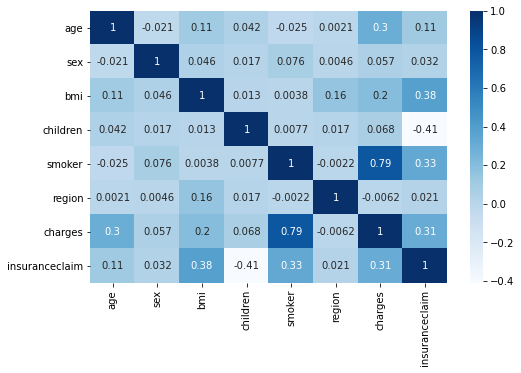

In [7]:
d3cor=d3.corr()
plt.figure(figsize=(8,5))
sns.heatmap(d3cor,cmap='Blues',annot=True)

In [8]:
#insurance claim has a negative correlation with no.of children
#it is highly correlated with bmi,smoking habit and their hospital expenses

In [9]:
collist=d3.columns.values
ncol=8
nrows=10

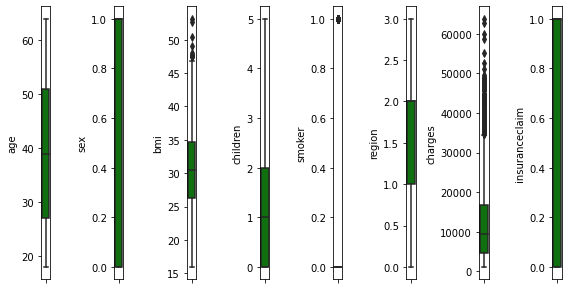

In [10]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d3[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [11]:
#there are outliers present in charges and bmi

In [12]:
d3.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [13]:
#smoker and charges columns are highly skewed

In [14]:
for col in d3.columns:
    if d3.skew().loc[col]>0.55:
        d3[col]=np.log1p(d3[col])

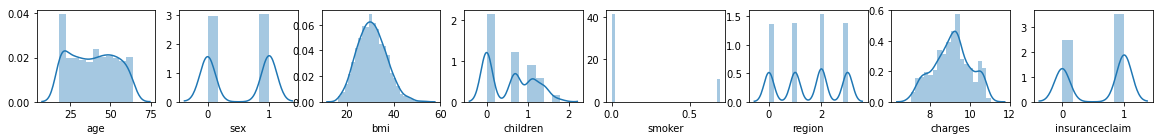

In [15]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d3[collist[i]])

In [16]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(d3))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.69138533,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 1.78986137,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.75956237,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 1.85192132,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 1.62503295,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.2851735 ,
        0.84190989]])

In [17]:
threshold=3
print(np.where(z>3))

(array([ 116,  847, 1047, 1317], dtype=int64), array([2, 2, 2, 2], dtype=int64))


In [18]:
d3_new=d3[(z<3).all(axis=1)]
print(d3.shape)
print(d3_new.shape)

(1338, 8)
(1334, 8)


In [19]:
#4 rows are deleted due to outliers

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
x=d3_new.iloc[:,:-1]
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,0.693147,3,9.734236
1,18,1,33.770,0.693147,0.000000,2,7.453882
2,28,1,33.000,1.386294,0.000000,2,8.400763
3,33,1,22.705,0.000000,0.000000,1,9.998137
4,32,1,28.880,0.000000,0.000000,1,8.260455
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.386294,0.000000,1,9.268755
1334,18,0,31.920,0.000000,0.000000,0,7.699381
1335,18,0,36.850,0.000000,0.000000,2,7.396847
1336,21,0,25.800,0.000000,0.000000,3,7.605365


In [22]:
y=d3_new.iloc[:,-1]
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1334, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.44224939, -1.00752456, -0.4503585 , ...,  1.97140734,
         1.3435945 ,  0.69173528],
       [-1.51352831,  0.99253164,  0.5281905 , ..., -0.50725184,
         0.43927812, -1.79514711],
       [-0.80073908,  0.99253164,  0.39982888, ..., -0.50725184,
         0.43927812, -0.76250797],
       ...,
       [-1.51352831, -1.00752456,  1.041637  , ..., -0.50725184,
         0.43927812, -1.85734801],
       [-1.29969154, -1.00752456, -0.80043566, ..., -0.50725184,
         1.3435945 , -1.6299443 ],
       [ 1.55146537, -1.00752456, -0.25531552, ...,  1.97140734,
        -0.46503826,  1.28687213]])

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 47 is 0.9965986394557823


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=47)

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.826530612244898
[[101  27]
 [ 24 142]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       128
           1       0.84      0.86      0.85       166

    accuracy                           0.83       294
   macro avg       0.82      0.82      0.82       294
weighted avg       0.83      0.83      0.83       294



In [28]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [29]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([0.99908967, 0.97267529, 0.44431019, 0.06422753, 0.40338919,
       0.99175097, 0.03849757, 0.73014332, 0.78115338, 0.81994955,
       0.9215112 , 0.63098368, 0.9953595 , 0.97575341, 0.9909463 ,
       0.32520592, 0.0253634 , 0.01081113, 0.85651399, 0.92846454,
       0.70316884, 0.96578653, 0.59104146, 0.08555833, 0.11694043,
       0.99563093, 0.35820767, 0.6879964 , 0.99662858, 0.07876178,
       0.9610351 , 0.02021983, 0.93589096, 0.8454228 , 0.85593182,
       0.75126645, 0.01718202, 0.6102671 , 0.8586206 , 0.50759652,
       0.20084788, 0.66933997, 0.01040654, 0.0084529 , 0.18130138,
       0.89800679, 0.53422689, 0.97278913, 0.43957447, 0.01047363,
       0.02931488, 0.62866214, 0.90271976, 0.93395084, 0.98256931,
       0.54729321, 0.96101429, 0.88606021, 0.01945376, 0.69023293,
       0.09877076, 0.26645208, 0.01258684, 0.99616488, 0.98916614,
       0.03260795, 0.58057936, 0.08922349, 0.02547527, 0.81396923,
       0.99798192, 0.21606717, 0.05554292, 0.84236134, 0.91580

In [30]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [31]:
fpr

array([0.       , 0.       , 0.       , 0.015625 , 0.015625 , 0.0234375,
       0.0234375, 0.03125  , 0.03125  , 0.0390625, 0.0390625, 0.046875 ,
       0.046875 , 0.0546875, 0.0546875, 0.0625   , 0.0625   , 0.0703125,
       0.0703125, 0.078125 , 0.078125 , 0.0859375, 0.0859375, 0.09375  ,
       0.09375  , 0.1015625, 0.1015625, 0.109375 , 0.109375 , 0.1171875,
       0.1171875, 0.1328125, 0.1328125, 0.15625  , 0.15625  , 0.1640625,
       0.1640625, 0.171875 , 0.171875 , 0.2109375, 0.2109375, 0.25     ,
       0.25     , 0.296875 , 0.296875 , 0.3828125, 0.3828125, 0.46875  ,
       0.46875  , 0.6484375, 0.6484375, 0.65625  , 0.65625  , 0.7109375,
       0.7109375, 0.75     , 0.75     , 0.7578125, 0.7578125, 0.8046875,
       0.8046875, 0.8671875, 0.8671875, 0.9140625, 0.9140625, 0.9765625,
       0.9765625, 1.       ])

In [32]:
tpr

array([0.        , 0.0060241 , 0.55421687, 0.55421687, 0.59638554,
       0.59638554, 0.60843373, 0.60843373, 0.62048193, 0.62048193,
       0.6686747 , 0.6686747 , 0.69277108, 0.69277108, 0.69879518,
       0.69879518, 0.71084337, 0.71084337, 0.72891566, 0.72891566,
       0.73493976, 0.73493976, 0.75301205, 0.75301205, 0.76506024,
       0.76506024, 0.77108434, 0.77108434, 0.79518072, 0.79518072,
       0.80120482, 0.80120482, 0.81927711, 0.81927711, 0.84337349,
       0.84337349, 0.84939759, 0.84939759, 0.85542169, 0.85542169,
       0.86144578, 0.86144578, 0.87951807, 0.87951807, 0.89156627,
       0.89156627, 0.89759036, 0.89759036, 0.90361446, 0.90361446,
       0.90963855, 0.90963855, 0.91566265, 0.91566265, 0.93373494,
       0.93373494, 0.94578313, 0.94578313, 0.96385542, 0.96385542,
       0.97590361, 0.97590361, 0.98192771, 0.98192771, 0.9939759 ,
       0.9939759 , 1.        , 1.        ])

In [33]:
thresholds

array([1.99993901, 0.99993901, 0.88097982, 0.87747908, 0.85593182,
       0.85010646, 0.84236134, 0.84079312, 0.83081264, 0.82806365,
       0.79318423, 0.79225654, 0.75393027, 0.75126645, 0.73958127,
       0.73895649, 0.73014332, 0.72420177, 0.69287841, 0.69186289,
       0.69023293, 0.69021685, 0.67742431, 0.67367458, 0.66346234,
       0.65294622, 0.64693725, 0.64692367, 0.63098368, 0.63043237,
       0.62866214, 0.6102671 , 0.58057936, 0.55584627, 0.53972086,
       0.53422689, 0.53274228, 0.52988517, 0.52261407, 0.50080565,
       0.48950081, 0.44381325, 0.43122878, 0.37089118, 0.36820938,
       0.29348398, 0.28680933, 0.23252672, 0.21654999, 0.11482086,
       0.11174356, 0.10504687, 0.10225204, 0.08922349, 0.07876178,
       0.06251919, 0.06102665, 0.05765068, 0.05554292, 0.04037427,
       0.03904589, 0.02931488, 0.02547527, 0.02021983, 0.01945376,
       0.0084529 , 0.00810476, 0.00291751])

<function matplotlib.pyplot.show(*args, **kw)>

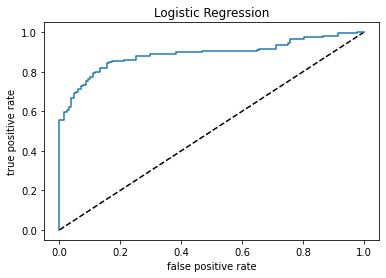

In [34]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show

In [35]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.822242093373494


In [36]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7517006802721088
[[113  15]
 [ 58 108]]
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       128
           1       0.88      0.65      0.75       166

    accuracy                           0.75       294
   macro avg       0.77      0.77      0.75       294
weighted avg       0.78      0.75      0.75       294



In [37]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8707482993197279
[[119   9]
 [ 29 137]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       128
           1       0.94      0.83      0.88       166

    accuracy                           0.87       294
   macro avg       0.87      0.88      0.87       294
weighted avg       0.88      0.87      0.87       294



In [38]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8537414965986394
[[115  13]
 [ 30 136]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.91      0.82      0.86       166

    accuracy                           0.85       294
   macro avg       0.85      0.86      0.85       294
weighted avg       0.86      0.85      0.85       294



In [39]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8537414965986394
[[115  13]
 [ 30 136]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.91      0.82      0.86       166

    accuracy                           0.85       294
   macro avg       0.85      0.86      0.85       294
weighted avg       0.86      0.85      0.85       294



In [40]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9965986394557823
[[128   0]
 [  1 165]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       128
           1       1.00      0.99      1.00       166

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



<function matplotlib.pyplot.show(*args, **kw)>

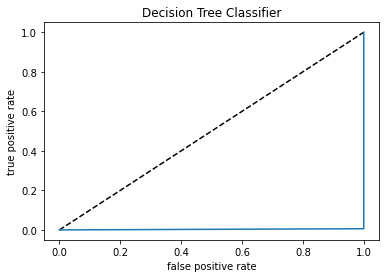

In [41]:
#Decision tree curve
y_pred_prob=dtc.predict_proba(x_test)[:,0]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show

In [42]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.822242093373494


In [43]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8809523809523809
[[113  15]
 [ 20 146]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       128
           1       0.91      0.88      0.89       166

    accuracy                           0.88       294
   macro avg       0.88      0.88      0.88       294
weighted avg       0.88      0.88      0.88       294



In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.85018727 0.89138577 0.87265918 0.87640449 0.85338346]
0.8688040325532933 0.015277054802070108


In [46]:
gnbscores=cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.75655431 0.78651685 0.80149813 0.85393258 0.7593985 ]
0.7915800737799554 0.035423996977585984


In [47]:
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.86891386 0.87640449 0.89138577 0.93258427 0.87969925]
0.889797527526682 0.022586296995762718


In [48]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.99625468 0.95505618 0.97003745 0.96629213 0.98120301]
0.9737686913913999 0.014006198211082063


In [49]:
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.88014981 0.86516854 0.86142322 0.8988764  0.87969925]
0.8770634451296783 0.013254310350749181


In [50]:
import joblib
joblib.dump(dtc,'dtc_sbi.pkl')

['dtc_sbi.pkl']